# Add data to DB

In [15]:
# from pathlib import Path

# db_path = Path(r"C:\Project\SATA\DB\sata_data.db")

# if db_path.exists():
#     db_path.unlink()
#     print("🗑️ Database deleted successfully")
# else:
#     print("⚠️ Database file not found")


In [16]:
# import sqlite3
# import pandas as pd
# from pathlib import Path

# # ---------- Paths ----------
# csv_path = Path(r"C:\Project\SATA\CSV\AI TestData - Parameter_table.csv")
# db_dir = Path(r"C:\Project\SATA\DB")
# db_path = db_dir / "sata_data.db"

# # ---------- Create DB folder ----------
# db_dir.mkdir(parents=True, exist_ok=True)

# # ---------- Load CSV ----------
# df = pd.read_csv(csv_path)

# # ---------- SQLite Connection ----------
# conn = sqlite3.connect(db_path)

# # ---------- Create Table & Insert Data ----------
# table_name = "Parameter_table"

# df.to_sql(
#     name=table_name,
#     con=conn,
#     if_exists="replace",   # replace if table already exists
#     index=False            # don't add extra index column
# )

# # ---------- Close Connection ----------
# conn.close()

# print("✅ CSV data successfully loaded into SQLite DB")
# print(f"📄 Database Location: {db_path}")
# print(f"📊 Table Name: {table_name}")


In [17]:
import sqlite3
import pandas as pd
from pathlib import Path

# ---------- DB Path ----------
db_path = Path(r"C:\Project\SATA\DB\sata_data.db")

# ---------- Connect ----------
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ---------- Get All Tables ----------
cursor.execute("""
    SELECT name 
    FROM sqlite_master 
    WHERE type='table';
""")

tables = cursor.fetchall()

print("📊 Tables found in database:\n")

# ---------- Loop Through Tables ----------
for (table_name,) in tables:
    print(f"🔹 Table: {table_name}")

    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, conn)

    if df.empty:
        print("⚠️ No data found\n")
    else:
        print(df)
        print("-" * 60)

# ---------- Close ----------
conn.close()


📊 Tables found in database:

🔹 Table: static_table
                          Content        Value1    Value2 Value3  Value4
0  GR Contract Number for change           1290       NaN    NaN     NaN
1                       supplier           Audi       BMW  Scoda  Ducati
2                       Material   Carbon Fiber     Steel    NaN     NaN
3     Plant or distribution Lines         India   Germany    NaN     NaN
4                  Payment terms         1 year       NaN    NaN     NaN
5          Proposed Delivery Date    03/04/2026  5/5/2026    NaN     NaN
------------------------------------------------------------
🔹 Table: Parameter_table
      Module                       Application             Process  \
0   Ordering  Manage Central Purchase Contract  GR Contract Change   
1   Ordering  Manage Central Purchase Contract   Contract Creation   
2   Ordering  Manage Central Purchase Contract     Contract Change   
3  sourceing       Supplier Managed Quotations   Create Quatations   

 

# Creating an SQL agent

In [18]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [19]:
class State(TypedDict):
    nlist : Annotated[list[str], operator.add]   

In [20]:
def node_a(state: State) -> State:
    return(State(nlist = ["A"]))

def node_b(state: State) -> State:
    return(State(nlist = ["B"]))
    
def node_c(state: State) -> State:
    return(State(nlist = ["C"]))

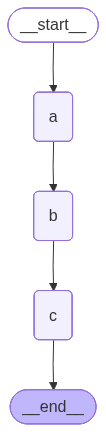

In [21]:
builder = StateGraph(State)

# Add nodes
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)

# Add edges
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", END)
# builder.add_conditional_edges("a", conditional_edge)

# Compile and display
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))